In [ ]:
from google.colab import files
uploaded = files.upload()
# Setup
from datetime import datetime
import os
import numpy as np
import pandas as pd
import scipy.stats as st
import io




Saving Bike_sharing.csv to Bike_sharing (1).csv


In [ ]:
Bikes = pd.read_csv(io.BytesIO(uploaded['Bike_sharing.csv']))

In [ ]:
Bikes.dtypes


instant           int64
dteday           object
season            int64
yr                int64
mnth              int64
holiday         float64
weekday         float64
workingday      float64
weathersit        int64
T : Celsius     float64
aT : Celsius    float64
hum             float64
windspeed       float64
casual          float64
registered      float64
cnt             float64
dtype: object

In [ ]:
Bikes.isnull().sum()

instant          0
dteday           0
season           0
yr               0
mnth             0
holiday         14
weekday          3
workingday      12
weathersit       0
T : Celsius      9
aT : Celsius     5
hum              3
windspeed        2
casual           2
registered       5
cnt              2
dtype: int64

In [ ]:
Bikes.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,T : Celsius,aT : Celsius,hum,windspeed,casual,registered,cnt
0,1,01/01/11,1,0,1,0.0,6.0,0.0,2,8.175849,7.999250,80.5833,10.749882,331.0,654.0,985.0
1,2,01/02/11,1,0,1,0.0,0.0,0.0,2,9.083466,7.346774,69.6087,16.652113,131.0,670.0,801.0
2,3,01/03/11,1,0,1,0.0,1.0,1.0,1,1.229108,-3.499270,43.7273,16.636703,120.0,1229.0,1349.0
3,4,01/04/11,1,0,1,0.0,2.0,1.0,1,1.400000,-1.999948,59.0435,10.739832,108.0,1454.0,1562.0
4,5,01/05/11,1,0,1,0.0,3.0,1.0,1,2.666979,-0.868180,43.6957,12.522300,82.0,1518.0,1600.0


In [ ]:
Bikes[Bikes.weekday.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,T : Celsius,aT : Celsius,hum,windspeed,casual,registered,cnt
136,137,17/05/11,2,0,5,0.0,NaN,1.0,2,18.398349,19.542914,83.7917,18.582718,678.0,3445.0,4123.0
137,138,18/05/11,2,0,5,0.0,NaN,1.0,2,NaN,18.792428,87.0000,13.499964,536.0,3319.0,3855.0
138,139,19/05/11,2,0,5,0.0,NaN,1.0,2,NaN,17.708972,82.9583,7.250271,735.0,3840.0,4575.0


In [ ]:
Bikes.at[136,"weekday"]=2
Bikes.at[137,"weekday"]=3
Bikes.at[138,"weekday"]=4
Bikes[Bikes.weekday.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,T : Celsius,aT : Celsius,hum,windspeed,casual,registered,cnt


In [ ]:
Bikes[Bikes.workingday.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,T : Celsius,aT : Celsius,hum,windspeed,casual,registered,cnt
35,36,02/05/11,1,0,2,0.0,6.0,NaN,2,2.966651,0.041828,92.9167,10.792293,100.0,905.0,1005.0
36,37,02/06/11,1,0,2,0.0,0.0,NaN,1,5.434151,3.250286,56.8333,9.500600,354.0,1269.0,1623.0
46,47,16/02/11,1,0,2,0.0,3.0,NaN,1,6.958267,4.869200,42.3478,16.869997,218.0,1897.0,2115.0
63,64,03/05/11,1,0,3,0.0,6.0,NaN,2,10.055849,8.999414,78.9167,16.875357,640.0,1437.0,2077.0
92,93,04/03/11,2,0,4,0.0,0.0,NaN,1,9.781651,8.998622,48.0000,12.208271,1651.0,1598.0,3249.0


In [ ]:
Bikes.at[35,"workingday"]=1
Bikes.at[36,"workingday"]=1
Bikes.at[46,"workingday"]=1
Bikes.at[63,"workingday"]=1
Bikes.at[92,"workingday"]=1
Bikes.at[131,"workingday"]=1
Bikes.at[132,"workingday"]=1
Bikes.at[133,"workingday"]=0
Bikes.at[134,"workingday"]=0
Bikes.at[238,"workingday"]=1
Bikes.at[239,"workingday"]=0
Bikes.at[240,"workingday"]=0
Bikes[Bikes.workingday.isna()].head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,T : Celsius,aT : Celsius,hum,windspeed,casual,registered,cnt


In [ ]:
Bikes[Bikes.holiday.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,T : Celsius,aT : Celsius,hum,windspeed,casual,registered,cnt
199,200,19/07/11,3,0,7,NaN,2.0,1.0,1,28.503349,33.333614,65.0417,8.750200,752.0,3789.0,4541.0
200,201,20/07/11,3,0,7,NaN,3.0,1.0,1,28.111651,33.292100,70.7083,7.625739,644.0,3688.0,4332.0
201,202,21/07/11,3,0,7,NaN,4.0,1.0,2,30.305000,38.540486,69.1250,14.875407,632.0,3152.0,3784.0
709,710,12/10/12,4,1,12,NaN,1.0,1.0,2,12.484151,12.747950,92.5000,12.750636,329.0,4841.0,5170.0
710,711,12/11/12,4,1,12,NaN,2.0,1.0,2,8.606651,6.331958,59.6667,19.834479,282.0,5219.0,5501.0


In [ ]:
Bikes.at[710,"holiday"]=1
Bikes.loc[:,'holiday'] =Bikes.loc[:,'holiday'].fillna(Bikes.loc[:,'holiday'].mode()[0])
Bikes.loc[:,'windspeed'] =Bikes.loc[:,'windspeed'].fillna(Bikes.loc[:,'windspeed'].median())
Bikes.isnull().sum()


instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
T : Celsius     9
aT : Celsius    5
hum             3
windspeed       0
casual          2
registered      5
cnt             2
dtype: int64

In [ ]:
sum2h=Bikes[Bikes["season"] == 2]["hum"]
Bikes = Bikes.fillna({"hum":sum2h.mean()})
Bikes.isnull().sum()

instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
T : Celsius     9
aT : Celsius    5
hum             0
windspeed       0
casual          2
registered      5
cnt             2
dtype: int64

In [ ]:
Bikes = Bikes.dropna(subset=["casual"])
Bikes = Bikes.dropna(subset=["cnt"])
Bikes.isnull().sum()


instant         0
dteday          0
season          0
yr              0
mnth            0
holiday         0
weekday         0
workingday      0
weathersit      0
T : Celsius     9
aT : Celsius    5
hum             0
windspeed       0
casual          0
registered      5
cnt             0
dtype: int64

In [ ]:
Bikes.rename(columns={'T : Celsius': 'Tcelsius',"aT : Celsius":"aTcelsius"}, inplace=True)
Bikes[Bikes.aTcelsius.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,Tcelsius,aTcelsius,hum,windspeed,casual,registered,cnt
84,85,26/03/11,2,0,3,0.0,6.0,0.0,1,4.494151,NaN,39.416700,14.041257,981.0,1515.0,2496.0
94,95,04/05/11,2,0,4,0.0,2.0,1.0,2,11.465849,NaN,64.208300,26.000489,167.0,1628.0,1795.0
121,122,05/02/11,2,0,5,0.0,1.0,1.0,2,17.810849,NaN,62.631534,12.291418,847.0,3554.0,4401.0
127,128,05/08/11,2,0,5,0.0,0.0,0.0,1,16.831651,NaN,63.166700,5.000712,1401.0,2932.0,4333.0
128,129,05/09/11,2,0,5,0.0,1.0,1.0,1,17.027500,NaN,58.875000,11.792000,664.0,3698.0,4362.0


In [ ]:
Bikes[Bikes.Tcelsius.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,Tcelsius,aTcelsius,hum,windspeed,casual,registered,cnt
49,50,19/02/11,1,0,2,0.0,6.0,0.0,1,NaN,9.832664,18.7917,34.000021,532.0,1103.0,1635.0
50,51,20/02/11,1,0,2,0.0,0.0,0.0,1,NaN,2.303780,40.7826,14.956745,639.0,1173.0,1812.0
51,52,21/02/11,1,0,2,1.0,1.0,0.0,2,NaN,2.748950,60.5000,20.625682,195.0,912.0,1107.0
52,53,22/02/11,1,0,2,0.0,2.0,1.0,1,NaN,-3.721822,57.7778,13.110761,74.0,1376.0,1450.0
53,54,23/02/11,1,0,2,0.0,3.0,1.0,1,NaN,0.217322,42.3043,6.305571,139.0,1778.0,1917.0


In [ ]:
sum2T=Bikes[Bikes["season"] == 2]["Tcelsius"]
sum1T=Bikes[Bikes["season"] == 1]["Tcelsius"]
sum2aT=Bikes[Bikes["season"] == 2]["aTcelsius"]
Bikes = Bikes.fillna({"aTcelsius":sum2aT.mean()})
Bikes.at[137,"Tcelsius"]=sum2T.mean()
Bikes.at[138,"Tcelsius"]=sum2T.mean()
Bikes.at[139,"Tcelsius"]=sum2T.mean()
Bikes = Bikes.fillna({"Tcelsius":sum1T.mean()})

Bikes.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
Tcelsius      0
aTcelsius     0
hum           0
windspeed     0
casual        0
registered    5
cnt           0
dtype: int64

In [ ]:
Bikes[Bikes.registered.isna()].head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,Tcelsius,aTcelsius,hum,windspeed,casual,registered,cnt
6,7,01/07/11,1,0,1,0.0,5.0,1.0,2,1.236534,-2.216626,49.8696,11.304642,148.0,NaN,1510.0
112,113,23/04/11,2,0,4,0.0,6.0,0.0,2,13.620000,13.707986,88.7917,15.458575,1462.0,NaN,4036.0
113,114,24/04/11,2,0,4,0.0,0.0,0.0,2,19.338349,20.416358,81.0833,12.875725,1710.0,NaN,4191.0
114,115,25/04/11,2,0,4,0.0,1.0,1.0,1,20.513349,21.917000,77.6667,12.417311,773.0,NaN,4073.0
260,261,18/09/11,3,0,9,0.0,0.0,0.0,1,15.852500,16.375442,69.5000,11.958361,1353.0,NaN,4274.0


In [ ]:
sum1r=Bikes[Bikes["season"] == 1]["registered"]
sum2r=Bikes[Bikes["season"] == 2]["registered"]
sum3r=Bikes[Bikes["season"] == 3]["registered"]
Bikes.at[6,"registered"]=sum1r.median()
Bikes.at[260,"registered"]=sum3r.median()
Bikes = Bikes.fillna({"registered":sum2r.median()})

Bikes.isnull().sum()


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
Tcelsius      0
aTcelsius     0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


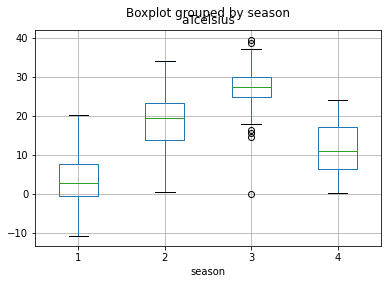

In [ ]:
Bikes.boxplot(by ='season', column =['aTcelsius'], grid = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


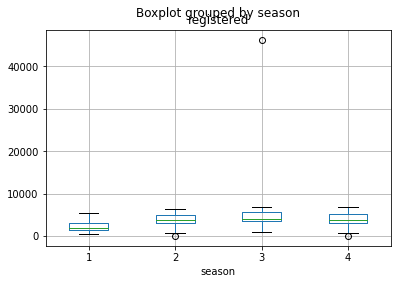

In [ ]:
Bikes.boxplot(by ='season', column =['registered'], grid = True)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


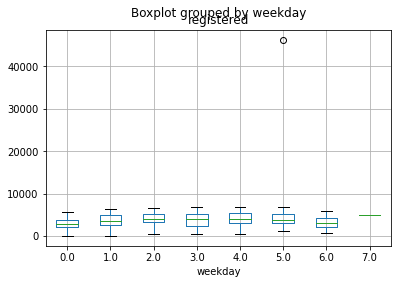

In [ ]:
Bikes.boxplot(by ='weekday', column =['registered'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


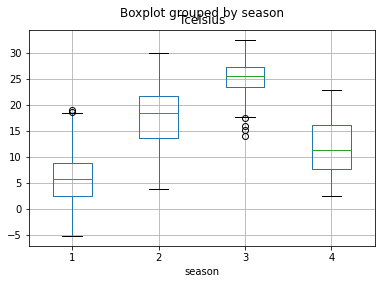

In [ ]:
Bikes.boxplot(by ='season', column =['Tcelsius'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


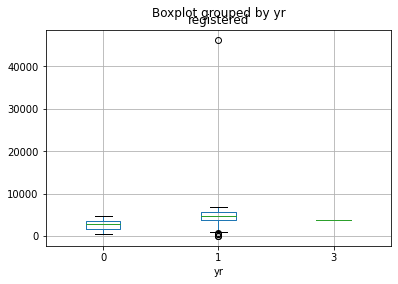

In [ ]:
Bikes.boxplot(by ='yr', column =['registered'], grid = True)


In [ ]:
Bikes.at[305,"yr"]=0


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


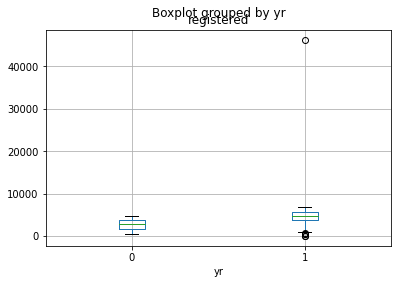

In [ ]:
Bikes.boxplot(by ='yr', column =['registered'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


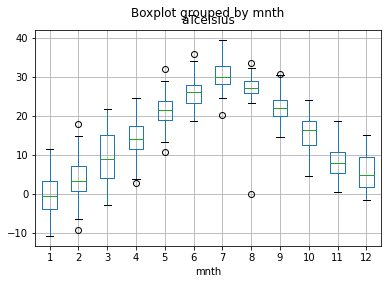

In [ ]:
Bikes.boxplot(by ='mnth', column =['aTcelsius'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


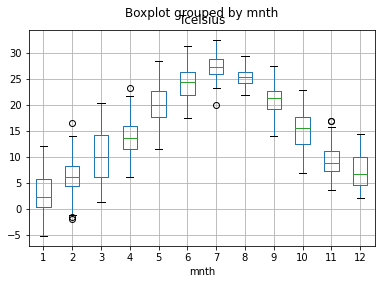

In [ ]:
Bikes.boxplot(by ='mnth', column =['Tcelsius'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


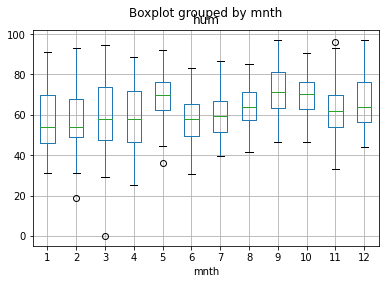

In [ ]:
Bikes.boxplot(by ='mnth', column =['hum'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


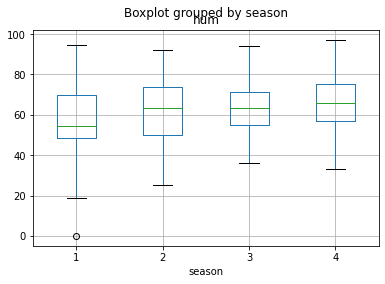

In [ ]:
Bikes.boxplot(by ='season', column =['hum'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


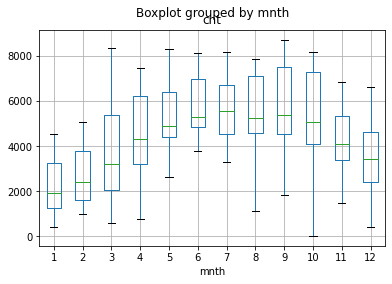

In [ ]:
Bikes.boxplot(by ='mnth', column =['cnt'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


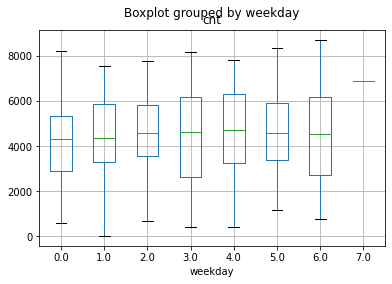

In [ ]:
Bikes.boxplot(by ='weekday', column =['cnt'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


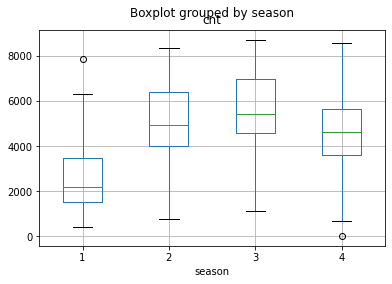

In [ ]:
Bikes.boxplot(by ='season', column =['cnt'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


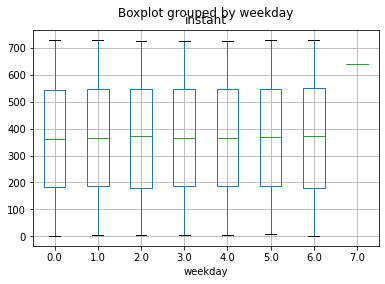

In [ ]:
Bikes.boxplot(by ='weekday', column =['instant'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


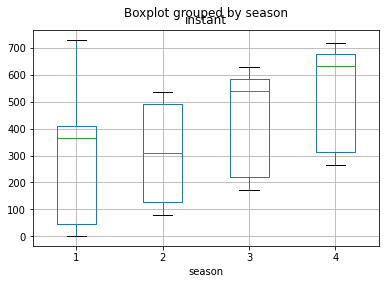

In [ ]:
Bikes.boxplot(by ='season', column =['instant'], grid = True)


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


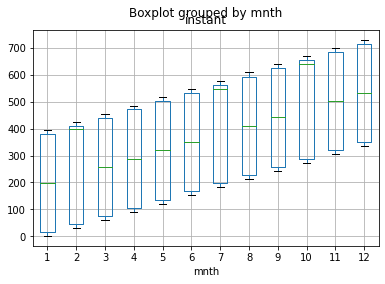

In [ ]:
Bikes.boxplot(by ='mnth', column =['instant'], grid = True)


In [ ]:
Bikes.to_csv("BikesCleanF.csv")